In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings


#and 연산 

x_anddata= [[0,0],
            [0,1],
            [1,0],
            [1,1]]
y_anddata=[[0],[0],[0],[1]]

print(y_anddata)

X = tf.placeholder(shape=[None,2],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([2,1]), name="weight"  )
b= tf.Variable(tf.random_normal([1]),name="bias")

logit = tf.matmul(X,W)+b

H=tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_anddata,Y:y_anddata} )
    if step%300 == 0 :
        print("cost:{}".format(cost_val))

predict = tf.cast(H>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
                                            #0.5보다 크면 1로 떨어짐
correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_anddata,Y:y_anddata} ) ))
        

    

[[0], [0], [0], [1]]
cost:1.3007614612579346
cost:0.6416905522346497
cost:0.5189223289489746
cost:0.4683036208152771
cost:0.43108364939689636
cost:0.40025073289871216
cost:0.3740113377571106
cost:0.3513678014278412
cost:0.33160412311553955
cost:0.3141796886920929
정확도 =1.0


In [56]:
#multiple layer 를 이용해 kor 문제 해결 (2개이사의 레이어)


import tensorflow as tf
import numpy as np
import pandas as pd
import warnings


x_data= [[0,0],
        [0,1],
        [1,0],
        [1,1]]
y_data=[[0],[0],[0],[1]]

X = tf.placeholder(shape=[None,2],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )


W1= tf.Variable(tf.random_normal([2,256]), name="weight1"  ) # 
b1= tf.Variable(tf.random_normal([256]),name="bias1")

layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)



W2= tf.Variable(tf.random_normal([256,512]), name="weight1"  ) # 
b2= tf.Variable(tf.random_normal([512]),name="bias1")

layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)


W_3=tf.Variable(tf.random_normal([512,1]), name="weight3"  )
b_3=tf.Variable(tf.random_normal([1]),name="bias3")

#print(sess.run([W1],feed_dict={X:x_data, Y:y_data} ))
logit=tf.matmul(layer2,W_3)+b_3
h=tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#print(cost)

#세션 초기화 -> 런을 만들고 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(6000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data , Y:y_data})
    
    if step%300==0 :
        print("cost:{}".format(cost_val))



        
#accuracy 예측값을 알아내는것 
predict = tf.cast(h>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
                                            #0.5보다 크면 1로 떨어짐
correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))


print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_data,Y:y_data} ) ))

# W= tf.Variable([[5,-7],[5,-7]], name="weight"  )
# b= tf.Variable([[-8,3]] ,name="bias")



cost:4.508669376373291
cost:0.004567247349768877
cost:0.0023713859263807535
cost:0.001627581543289125
cost:0.0012495584087446332
cost:0.0010194529313594103
cost:0.0008640398737043142
cost:0.0007517856429331005
cost:0.0006666595581918955
cost:0.0005997646367177367
cost:0.0005457483348436654
cost:0.0005011583562009037
cost:0.00046375609235838056
cost:0.000431897584348917
cost:0.00040439952863380313
cost:0.00038042888627387583
cost:0.00035927712451666594
cost:0.00034052622504532337
cost:0.00032373613794334233
cost:0.00030863448046147823
정확도 =1.0


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
cost: 0.4074634611606598
cost: 0.05211479216814041
cost: 0.10346760600805283
cost: 0.05837707594037056
cost: 0.058751799166202545
cost: 0.035064999014139175
cost: 0.027691474184393883
cost: 0.011470389552414417
cost: 0.01819542422890663
cost: 0.020554106682538986
정확도:0.9314000010490417


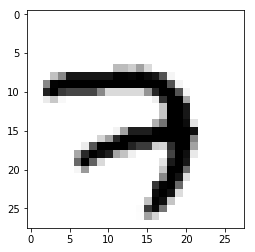

In [67]:
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings


#데이터 로딩

mnist = input_data.read_data_sets("./data/mnist", one_hot=True) #학습용으로 나온 데이터고 그냥 읽어내면됨
#원핫 처리없이 기본 데이터가 원핫으로 처리되어서 나옴 즉 데이터 전처리가 불필요

#mnist.train.num_examples

plt.imshow(mnist.train.images[0].reshape(28,28),cmap="Greys",interpolation="nearest"  )

#interpolation 뭔뜻?  2차배열로 바꿈 원래 이미지형태로


sess=tf.Session()
#sess.run(tf.argmax(mnist.train.labels[0]) #1차 배열을 2차배열로 만들어야 argmax 됨




#2.placeholder
#입력데이터는 이미지 데이터이고 3차원데이터인데 흑백이기때문에 2차원형태의 이미지 데이ㅓ이고 처리를 쉽게하기위해 
#이미지 자체의 데이터를 1차원으로 표현 
#28 * 28 이미지인데 1차원 28 * 28 => 784개의 열  



X=tf.placeholder(shape=[None,784],dtype=tf.float32 )
Y=tf.placeholder(shape=[None,10],dtype=tf.float32 )  # 0~9 까지 one hot incording 이라 10 앞에 행은 55000인데 none해줌


#3.weight

W=tf.Variable(tf.random_normal([784,256]), name="weight" )
b=tf.Variable(tf.random_normal([256]), name="bias"  )

layer=tf.sigmoid(tf.matmul(X,W)+b)#시그모이드해줘야함 근데 확률값을 구해야해서 소프트맥스해야하는데 레이어끼리 통과는 시그모이드로함

W1=tf.Variable(tf.random_normal([256,512]), name="weight" )
b1=tf.Variable(tf.random_normal([512]), name="bias"  )

layer2=tf.sigmoid(tf.matmul(layer,W1)+b1)


W2=tf.Variable(tf.random_normal([512,10]), name="weight2" )
b2=tf.Variable(tf.random_normal([10]), name="bias2"  )


logit=tf.matmul(layer2,W2)+b2

H=tf.nn.softmax(logit) #확률값으로 결과를 얻기위해서


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

batch_size=100
train_epoch=30

for step in range(train_epoch):
    num_of_iter=int(mnist.train.num_examples/batch_size)
    
    avg_cost = 0
    total_iteration = int(mnist.train._num_examples / batch_size)
    
    for i in range(num_of_iter):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        
        _,cost_val=sess.run([train,cost],feed_dict={X:batch_x,Y:batch_y})

        
    if step%3 == 0:
        print("cost: {}".format(cost_val))
        
#acuracy



predict = tf.argmax(H,1)
correct=tf.equal(predict , tf.argmax(Y,1)) 

accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도:{}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels})) )

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
cost: 2.3936567306518555
cost: 2.3080689907073975
cost: 2.362295150756836
cost: 2.3506903648376465
cost: 2.336737632751465
cost: 2.3346800804138184
cost: 2.3238463401794434
cost: 2.3392794132232666
cost: 2.301746368408203
cost: 2.348781108856201
정확도:0.09809999912977219


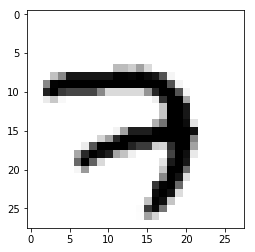

In [72]:
#sigmoid -> nn.relu 로 바꿈

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings


#데이터 로딩

mnist = input_data.read_data_sets("./data/mnist", one_hot=True) #학습용으로 나온 데이터고 그냥 읽어내면됨
#원핫 처리없이 기본 데이터가 원핫으로 처리되어서 나옴 즉 데이터 전처리가 불필요

#mnist.train.num_examples

plt.imshow(mnist.train.images[0].reshape(28,28),cmap="Greys",interpolation="nearest"  )

#interpolation 뭔뜻?  2차배열로 바꿈 원래 이미지형태로


sess=tf.Session()
#sess.run(tf.argmax(mnist.train.labels[0]) #1차 배열을 2차배열로 만들어야 argmax 됨




#2.placeholder
#입력데이터는 이미지 데이터이고 3차원데이터인데 흑백이기때문에 2차원형태의 이미지 데이ㅓ이고 처리를 쉽게하기위해 
#이미지 자체의 데이터를 1차원으로 표현 
#28 * 28 이미지인데 1차원 28 * 28 => 784개의 열  



X=tf.placeholder(shape=[None,784],dtype=tf.float32 )
Y=tf.placeholder(shape=[None,10],dtype=tf.float32 )  # 0~9 까지 one hot incording 이라 10 앞에 행은 55000인데 none해줌


#3.weight

W=tf.Variable(tf.random_normal([784,256]), name="weight" )
b=tf.Variable(tf.random_normal([256]), name="bias"  )

layer=tf.nn.relu(tf.matmul(X,W)+b)#시그모이드해줘야함 근데 확률값을 구해야해서 소프트맥스해야하는데 레이어끼리 통과는 시그모이드로함

W1=tf.Variable(tf.random_normal([256,512]), name="weight" )
b1=tf.Variable(tf.random_normal([512]), name="bias"  )

layer2=tf.nn.relu(tf.matmul(layer,W1)+b1)


W2=tf.Variable(tf.random_normal([512,10]), name="weight2" )
b2=tf.Variable(tf.random_normal([10]), name="bias2"  )


H=tf.matmul(layer2,W2)+b2

#H=tf.nn.softmax(logit) #확률값으로 결과를 얻기위해 RELU에선 할필요없는데 해도되긴함


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=H , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

batch_size=100
train_epoch=30

for step in range(train_epoch):
    num_of_iter=int(mnist.train.num_examples/batch_size)
    
    avg_cost = 0
    total_iteration = int(mnist.train._num_examples / batch_size)
    
    for i in range(num_of_iter):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        
        _,cost_val=sess.run([train,cost],feed_dict={X:batch_x,Y:batch_y})

        
    if step%3 == 0:
        print("cost: {}".format(cost_val))
        
#acuracy



predict = tf.argmax(H,1)
correct=tf.equal(predict , tf.argmax(Y,1)) 

accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도:{}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels})) )



In [ ]:
## MNIST -Multinomial Classification#relu#Xavier initialization 도입 초기 W값 지정

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf


tf.reset_default_graph()
#1. Data Loading
mnist = input_data.read_data_sets("./Data/mnist",one_hot = True) #one hot형태의 y 측 데이터 로딩

#2. Placeholer
##입력 데이터는 image data, 3차원 가로 세로 칼럼(depts 3 rgb color,빨노초 3레이어 지금은 흑백이어서 2차원 data.)
##2차원 데이터 이미지 데이터. 
#원래는 이미지 개수 가로 세로 칼라.-> 가로세로를 pixel data로 제공 = 이미지 데이터를 1차원으로 제공 28*28 = 784개의 열
#, 칼라도 흑백으로 생략 -> 2차원

X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32) #one hot 인코딩 y label

#3. Weight &bias
# W = tf.Variable(tf.random_normal([784,10]), name ="weight")
# b = tf.Variable(tf.random_normal([10]), name ="bias")
#W1 = tf.Variable(tf.random_normal([784,256]), name ="weight1")
W1 = tf.get_variable("wight1",shape = [784,256], initializer=  tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name ="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

#W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
W2 = tf.get_variable("wight2",shape = [256,512], initializer= tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name ="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

#W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
W3 = tf.get_variable("wight3",shape = [512,10], initializer= tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

#4. Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.sotfmax(logit) #확률값으로 결과를 얻는 방법
H = tf.matmul(layer2,W3) +b3
# H = tf.nn.softmax(logit)안해도 됨


# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

In [1]:
## MNIST -Multinomial Classification#relu#Xavier initialization 도입 초기 W값 지정#Drop out(overfitting 방지)

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf


tf.reset_default_graph() # 텐서플로우 초기화하는것
#1. Data Loading
mnist = input_data.read_data_sets("./Data/mnist",one_hot = True) #one hot형태의 y 측 데이터 로딩

#2. Placeholer
##입력 데이터는 image data, 3차원 가로 세로 칼럼(depts 3 rgb color,빨노초 3레이어 지금은 흑백이어서 2차원 data.)
##2차원 데이터 이미지 데이터. 
#원래는 이미지 개수 가로 세로 칼라.-> 가로세로를 pixel data로 제공 = 이미지 데이터를 1차원으로 제공 28*28 = 784개의 열
#, 칼라도 흑백으로 생략 -> 2차원

X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32) #one hot 인코딩 y label

#3. Weight &bias
# W = tf.Variable(tf.random_normal([784,10]), name ="weight")
# b = tf.Variable(tf.random_normal([10]), name ="bias")
#W1 = tf.Variable(tf.random_normal([784,256]), name ="weight1")
keep = tf.placeholder(dtype = tf.float32) #입력 값으로 사용하겠다. 상수로 박지 않고. 
W1 = tf.get_variable("wight1",shape = [784,256], initializer=  tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name ="bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep) #keepprob 유지할 확률 0.5~0.7
#W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
W2 = tf.get_variable("wight2",shape = [256,512], initializer= tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name ="bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep)
#W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
W3 = tf.get_variable("wight3",shape = [512,10], initializer= tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

#4. Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.sotfmax(logit) #확률값으로 결과를 얻는 방법
H = tf.matmul(layer2,W3) +b3
# H = tf.nn.softmax(logit)안해도 됨


# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y,keep:0.7})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels, keep:1}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./Data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0.8646591
0.30656216
0.2728759
0.30054075
0.3529044
0.25357306
0.22221154
0.33714893
0.23677036
0.27573228
0.9573
